In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import os

## Q1 根据本章所学知识，绘制每天销售数量和应收金额的变化趋势



In [2]:
df = pd.read_excel('朝阳医院2018年销售数据.xlsx')
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [6]:
dfg = df.groupby('购药时间')[['销售数量', '应收金额']].sum().sort_values('购药时间',ascending=True)
dfg.head()

,销售数量,应收金额
购药时间,,
2018-01-01 星期五,62.0,1375.4
2018-01-02 星期六,29.0,610.2
2018-01-03 星期日,43.0,1056.2
2018-01-04 星期一,39.0,818.7
2018-01-05 星期二,230.0,4658.5


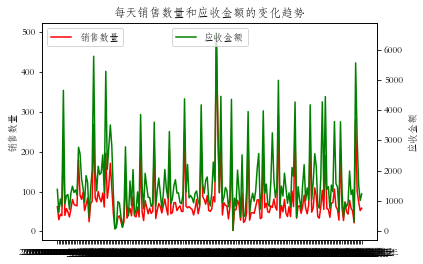

In [8]:
fig =plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dfg.index,dfg['销售数量'],label='销售数量',c= 'r')
ax1.set_ylabel('销售数量')
ax1.set_title("每天销售数量和应收金额的变化趋势")
# plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
ax1.legend(loc='upper left')
ax2 = ax1.twinx() #设置次坐标
ax2.plot(dfg.index,dfg['应收金额'],label='应收金额',c='g')
#ax2.plot(GDP_data['序号'],GDP_data['金融业增加值_当季值(亿元)'],label='工业增加值',c='g')
ax2.set_ylabel('应收金额')
ax2.set_xlabel('时间')
ax2.legend(loc='upper center')
plt.show()

## Q2 根据本章所学知识，绘制每周销售数量和应收金额的变化趋势



In [68]:
df = pd.read_excel('朝阳医院2018年销售数据.xlsx')

In [69]:
print(df.head())

             购药时间          社保卡号      商品编码     商品名称  销售数量   应收金额    实收金额
0  2018-01-01 星期五  1.616528e+06  236701.0  强力VC银翘片   6.0   82.8   69.00
1  2018-01-02 星期六  1.616528e+06  236701.0  清热解毒口服液   1.0   28.0   24.64
2  2018-01-06 星期三  1.260283e+07  236701.0       感康   2.0   16.8   15.00
3  2018-01-11 星期一  1.007034e+10  236701.0    三九感冒灵   1.0   28.0   28.00
4  2018-01-15 星期五  1.015543e+08  236701.0    三九感冒灵   8.0  224.0  208.00


In [63]:
df[df['购药时间'].isnull()]

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6570,NaN,11778628.0,2367011.0,高特灵,10.0,56.0,56.0
6574,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df = df.dropna()

In [70]:
df['购药日期'] = df['购药时间'].str.split(' ').str.get(0)

In [73]:
df.shape

(6575, 8)

In [74]:
df = df[df['购药日期']!='2018-02-29']

In [75]:
df.shape

(6552, 8)

In [76]:
df['购药日期'] = pd.to_datetime(df['购药时间'].str.split(' ').str.get(0), format='%Y-%m-%d')


In [77]:
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00,2018-01-01
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64,2018-01-02
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00,2018-01-06
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00,2018-01-11
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00,2018-01-15


In [79]:
df.set_index('购药日期', inplace=True)

In [80]:
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
购药日期,,,,,,,
2018-01-01,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
2018-01-02,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2018-01-06,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
2018-01-11,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
2018-01-15,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [81]:
df_weekly = df[['销售数量','应收金额']].resample(rule='1W').sum()
df_weekly.head()

,销售数量,应收金额
购药日期,,
2018-01-07,500.0,10570.9
2018-01-14,418.0,8470.0
2018-01-21,651.0,12834.5
2018-01-28,696.0,15105.2
2018-02-04,706.0,17680.3


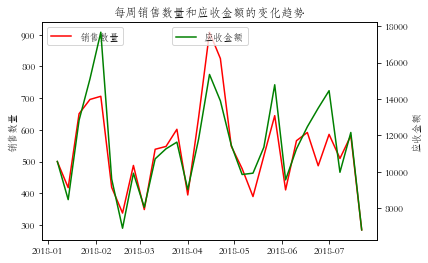

In [83]:
fig =plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_weekly.index,df_weekly['销售数量'],label='销售数量',c= 'r')
ax1.set_ylabel('销售数量')
ax1.set_title("每周销售数量和应收金额的变化趋势")
# plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
ax1.legend(loc='upper left')
ax2 = ax1.twinx() #设置次坐标
ax2.plot(df_weekly.index,df_weekly['应收金额'],label='应收金额',c='g')
ax2.set_ylabel('应收金额')
ax2.set_xlabel('时间')
ax2.legend(loc='upper center')
plt.show()

## Q3 根据本章所学知识，绘制每月销售数量和应收金额的变化趋势



In [84]:
df_month = df[['销售数量','应收金额']].resample(rule='1M').sum()
df_month.head()

,销售数量,应收金额
购药日期,,
2018-01-31,2518.0,53295.0
2018-02-28,1850.0,41907.7
2018-03-31,2224.0,45311.0
2018-04-30,3007.0,54238.3
2018-05-31,2214.0,50875.6


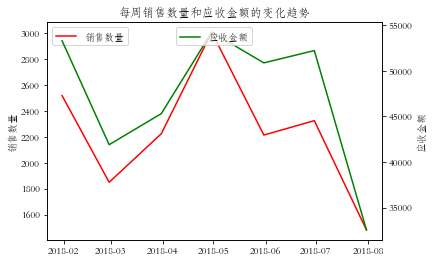

In [85]:
fig =plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_month.index,df_month['销售数量'],label='销售数量',c= 'r')
ax1.set_ylabel('销售数量')
ax1.set_title("每周销售数量和应收金额的变化趋势")
# plt.xticks(range(0,70,4),GDP_data.iloc[range(0,70,4),1],rotation=45)
ax1.legend(loc='upper left')
ax2 = ax1.twinx() #设置次坐标
ax2.plot(df_month.index,df_month['应收金额'],label='应收金额',c='g')
ax2.set_ylabel('应收金额')
ax2.set_xlabel('时间')
ax2.legend(loc='upper center')
plt.show()

## Q4 根据本章所学知识，统计那10种药销量最好，并进行可视化展示

提示，这是明细数据，首先应该按照天，周或者月进行汇总

In [89]:
dfg = df.groupby('商品名称')['销售数量'].sum().sort_values(ascending=False)
s = dfg[:10]

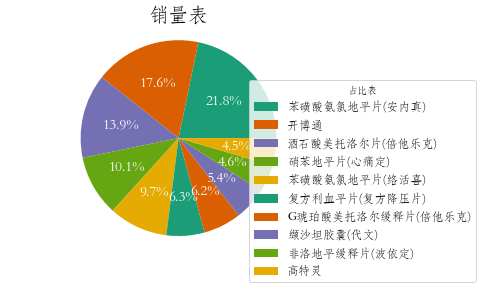

In [92]:
# 带图例的饼图
elements = s.index.to_list()
weights =s.values
colors = ['#1b9e77', '#d95f02','#7570b3','#66a613','#e6ab02','#1b9e77', '#d95f02','#7570b3','#66a613','#e6ab02']
wedges,texts,autotexts = plt.pie(weights,autopct='%3.1f%%',textprops=dict(color='w'),colors=colors)
plt.legend(wedges,elements,fontsize=12,title='占比表',loc ='center',
           bbox_to_anchor=(0.7,0.2,0.7,0.2)) # 上下左右的
plt.setp(autotexts,size=15,weight='bold')
plt.setp(texts,size=15)
plt.axis('equal')
plt.title('销量表',fontsize = 20)
plt.show()